# Sales Channel Prediction Case Study

Problem Statement:
    When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [29]:
data=pd.read_csv('Salesprediction.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [30]:
#Putting data into dat frame
ds=pd.DataFrame(data=data)

# EDA

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


All varibale are numeric and continous variables are numeric
Ther are total 200 rows and 5 columns in the dataset

In [32]:
ds.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There is no Null Values

<AxesSubplot:>

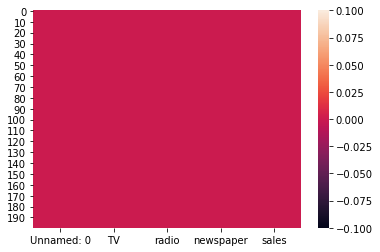

In [33]:
sns.heatmap(ds.isnull())

Heat map shows there is no null value 

# Summary Statistics

In [34]:
ds.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Key Observation: 1)The mean and median(50%) is similar in all the columns 2)There is good difference between 75% and max, in all the columns 3)Thers is large difference between 25% and min in all column. The observations 2 and 3 show that there may be extreme outliers presernt in the  columns.

<AxesSubplot:>

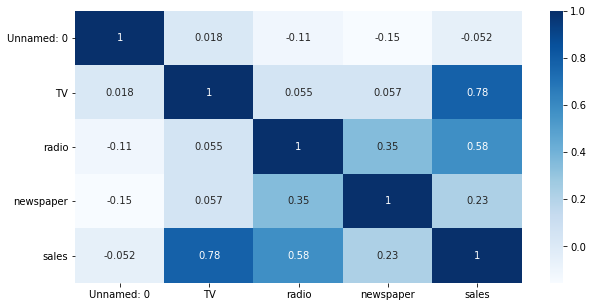

In [35]:
# Correlation Matrix ---Pearson Methos
fig =plt.figure(figsize=(10,5))
hc=ds.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap='Blues')

Key Observation: TV is highly positvely coreelated with Sales.

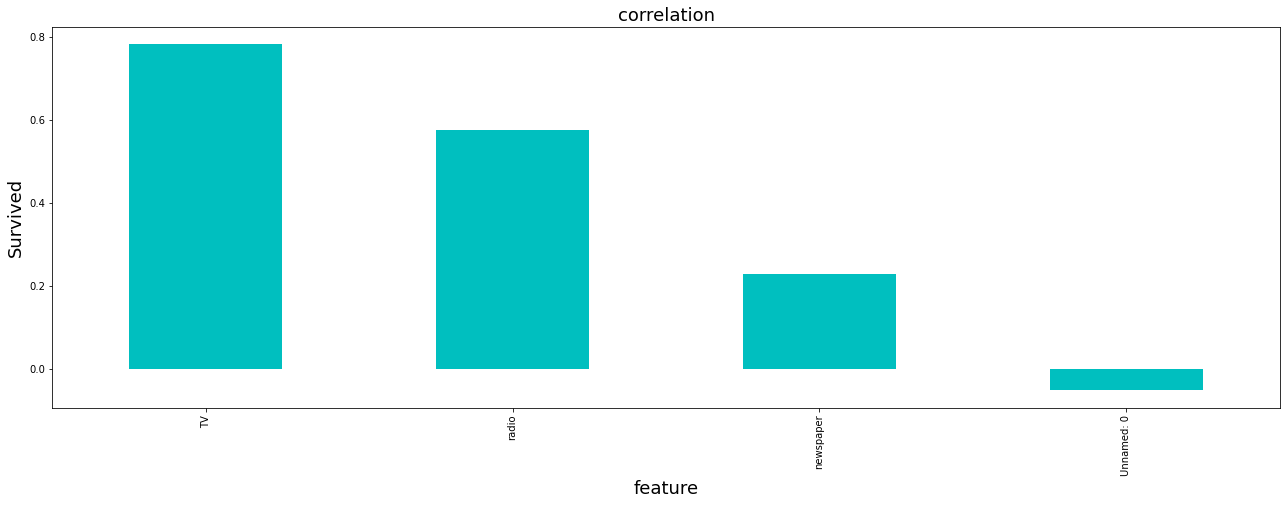

In [36]:
plt.figure(figsize=(22,7))
ds.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=18)
plt.ylabel('Survived',fontsize=18)
plt.title('correlation',fontsize =18)
plt.show()

TV, radio and newspaer are most postively correlated respetively.

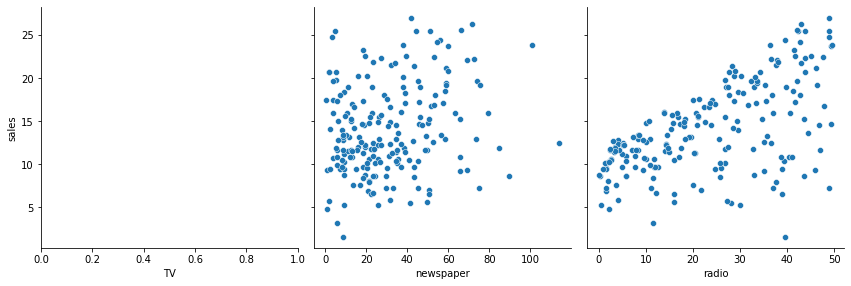

In [37]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(ds, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

<Figure size 432x288 with 0 Axes>

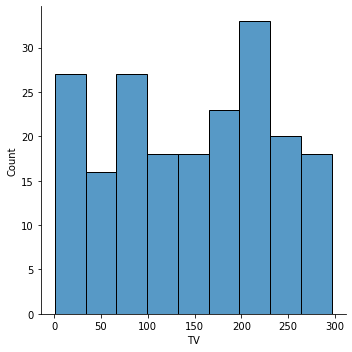

<Figure size 432x288 with 0 Axes>

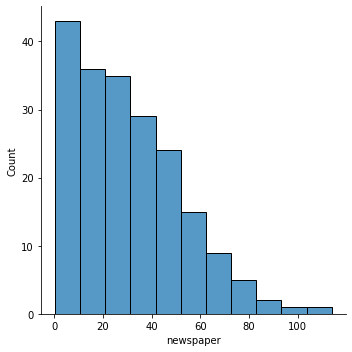

<Figure size 432x288 with 0 Axes>

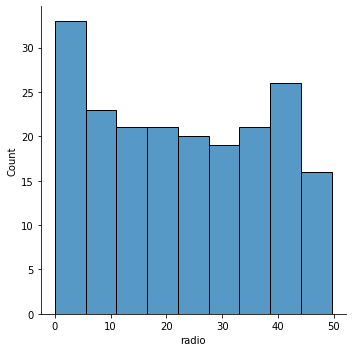

In [38]:
# ploting graph for alll the coulmns in one go
columns=['TV','newspaper','radio']
for i in ds[columns]:
    plt.figure()
    sns.displot(ds[i])

Unnamed: 0       AxesSubplot(0.125,0.125;0.133621x0.755)
TV            AxesSubplot(0.285345,0.125;0.133621x0.755)
radio          AxesSubplot(0.44569,0.125;0.133621x0.755)
newspaper     AxesSubplot(0.606034,0.125;0.133621x0.755)
sales         AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

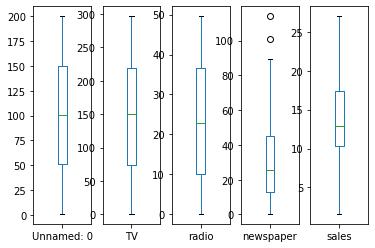

In [39]:
#As there are no null values in data, we can proceed with the next steps.
#Detecting Outliers
# Box plot for all coulmns
ds.plot(kind='box',subplots=True,layout=(1,5))

There is outlier present in Newspaper column

# Data Wrangling

In [23]:
#Handling the Outliers.Removing the outliers.
from scipy.stats import zscore
z=np.abs(zscore(ds))
z
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [24]:
# lets check the presence of outlier
print('shape before remooving the outliers:',ds.shape)
dsnew=ds[(z<3).all(axis=1)]

print('shape after remooving the outliers:',dsnew.shape)
# here 2 rows will be droped

shape before remooving the outliers: (200, 5)
shape after remooving the outliers: (198, 5)


In [44]:
dsnew.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
sales         0.407130
dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

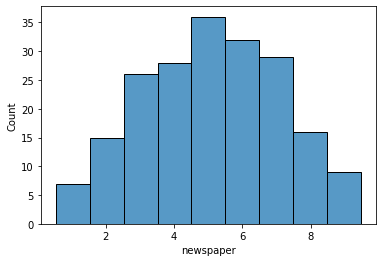

In [45]:
# redusing the Skewness 
dsnew['newspaper']=np.sqrt(dsnew['newspaper'])
sns.histplot(dsnew['newspaper'])

In [46]:
dsnew.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper    -0.040649
sales         0.407130
dtype: float64

In [47]:
dsnew.shape

(198, 5)

In [48]:
x = dsnew.drop(columns = ['sales'])
y = dsnew['sales']

In [49]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_new=sc.fit_transform(x)
x_new=pd.DataFrame(x,columns=x.columns)
x_new

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,8.318654
1,2,44.5,39.3,6.715653
2,3,17.2,45.9,8.324662
3,4,151.5,41.3,7.648529
4,5,180.8,10.8,7.641989
...,...,...,...,...
195,196,38.2,3.7,3.714835
196,197,94.2,4.9,2.846050
197,198,177.0,9.3,2.529822
198,199,283.6,42.0,8.136338


In [51]:
# To find the best random state using Decision Tree Regressor model

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=.30,random_state=i)
    mod= DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.9666912044469499 on random state 90


In [52]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(138, 4)
(60, 4)
(138,)
(60,)


70% of the data (104 rows) will be available for training the model & 30% (45 rows) will be available for testing the model

# Model Building & Evaluation

Since the target variable as continuous values we can build the regression models. Therefore oue evalution criteria will be: Evaluation Matrics : MAE,MSE,RMSE and R2 Score

In [54]:
# Linear Regression Model
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.878463889781972

In [55]:
from sklearn.metrics import r2_score
pred=lm.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9359096421813846
mean absolute error 1.0283704771038789
mean squarred error 1.5777842620446285
Root mean square error 1.256098826543767


In [56]:
# Decision Tree Regression Model
dc=DecisionTreeRegressor()
dc.fit(x_train,y_train)
dc.score(x_train,y_train)

1.0

In [57]:
from sklearn.metrics import r2_score
pred=dc.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9591561049651318
mean absolute error 0.7949999999999998
mean squarred error 1.0054999999999998
Root mean square error 1.0027462291128297


In [59]:
# KNeighbors Regression Model
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
kn.score(x_train,y_train)


0.8610985273772875

In [60]:
pred=kn.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.7631124496813775
mean absolute error 1.8676666666666668
mean squarred error 5.8317266666666665
Root mean square error 2.4148968231927976


In [61]:
# Random Forest Regression Model
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.9953472942694661

In [62]:
from sklearn.metrics import r2_score
pred=rf.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9663490588008565
mean absolute error 0.7284833333333303
mean squarred error 0.8284229833333275
Root mean square error 0.9101774460693517


Based on the results of above models, and comparing the R2 score and other evalution matrics result of MAE,MSE and RMSE.We can find the Random Forest Regression model is best model to predict the Happiness Score of countrien Score R2 Score MAE MSE RMSE.
Since the Random Forest model has the second hishest score(0.99) and lowest values of MAE, MSE,RMSE , it is the best model among the above four models.

# Improving the model accuracy using cross Validation

In [63]:
from sklearn.model_selection import cross_val_score
lmscores =cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.86874726 0.91624347 0.92554434 0.80895107 0.89605011]
0.8831072487910125 0.041885036989908565


In [64]:
from sklearn.model_selection import cross_val_score
dcscores =cross_val_score(dc,x,y,cv=5)
print(dcscores)
print(dcscores.mean(),dcscores.std())

[0.92973112 0.95079026 0.92605824 0.92438628 0.96787015]
0.9397672096529128 0.01695001295950377


In [65]:
from sklearn.model_selection import cross_val_score
knscores =cross_val_score(kn,x,y,cv=5)
print(knscores)
print(knscores.mean(),knscores.std())

[0.75368085 0.85971026 0.66104251 0.78398547 0.54995736]
0.7216752882484062 0.10688680953086392


In [66]:
from sklearn.model_selection import cross_val_score
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.97735399 0.9823552  0.97403474 0.95824842 0.97988369]
0.9743752083780237 0.008521572990468195


It can be observed that for the RandomForest algorithim the difference between the accuracy score of algorithim before and after the cross validation is minimum. So the best model with highet accuracy score and best on evalution with other matrix , RandomForest is the best model for predicting the sales

# HyperParameter tuning¶

In [67]:
from sklearn.model_selection import GridSearchCV 
parameter={'max_depth':np.arange(1,10),'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}

In [68]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [69]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [70]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto'}

In [71]:
rf_final=RandomForestRegressor(max_depth=9,criterion='mse',max_features='auto')
rf_final.fit(x_train,y_train)
rf_final.score(x_train,y_train)

0.9948707632313911

In [73]:
pred=rf_final.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.9655875584353327
mean absolute error 0.7232816065416041
mean squarred error 0.8471696924040582
Root mean square error 0.9204182160322872


# Saving the best Model

In [74]:
import joblib
joblib.dump(rf_final,'Model_SalesPrediction.obj')

['Model_SalesPrediction.obj']